<a href="https://colab.research.google.com/github/ArabianHindi/E-Commerce-Next.js/blob/main/COVID_19_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# If you have the .h5 file run this block to Recreate the exact same model,without the need to retrain it

new_model = tensorflow.keras.models.load_model('Covid19Detector (Final).h5')

new_model.summary()

Model: "CNN_COVID_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img_input (InputLayer)      [(None, 224, 224, 3)]     0         
                                                                 
 layer_1 (Conv2D)            (None, 224, 224, 32)      896       
                                                                 
 layer_2 (Conv2D)            (None, 224, 224, 64)      18496     
                                                                 
 layer_3 (MaxPooling2D)      (None, 112, 112, 64)      0         
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 layer_4 (Conv2D)            (None, 112, 112, 64)      36928     
                                                                 
 layer_5 (MaxPooling2D)      (None, 56, 56, 64)       

In [ ]:
# Upload google drive in our COLAB

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# install tensorflow version 2
%tensorflow_version 2.x


In [ ]:
# Importing library

import os
import cv2
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
# Create path

train_loc = '/content/drive/My Drive/Dataset/train/'
test_loc = '/content/drive/My Drive/Dataset/val/'

In [ ]:
# Preprocessing

trdata = ImageDataGenerator(rescale= 1./255,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            horizontal_flip = True,
)

traindata = trdata.flow_from_directory(directory = train_loc, target_size = (224,224))

tsdata = ImageDataGenerator(rescale= 1./255,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            horizontal_flip = True,
)

testdata = tsdata.flow_from_directory(directory = test_loc, target_size = (224,224))

Found 250 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


In [ ]:
#Classifying the Outputs

traindata.class_indices
class_names = ['Covid','Non-Covid']

In [ ]:
# define input image
input_shape = (224,224,3)

# create the Network
# Input layer
img_imput = Input(shape  = input_shape, name = 'img_input')

# Convo layers
x = Conv2D(32, (3,3) , padding = 'same' , activation='relu', name = 'layer_1') (img_imput)
x = Conv2D(64, (3,3) , padding = 'same' , activation='relu', name = 'layer_2') (x)
x = MaxPool2D((2,2), strides=(2,2), name = 'layer_3') (x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3,3) , padding = 'same' , activation='relu', name = 'layer_4') (x)
x = MaxPool2D((2,2), strides=(2,2), name = 'layer_5') (x)
x = Dropout(0.25)(x)

x = Conv2D(128, (3,3) , padding = 'same' , activation='relu', name = 'layer_6') (x)
x = MaxPool2D((2,2), strides=(2,2), name = 'layer_7') (x)
x = Dropout(0.25)(x)

x = Flatten(name = 'fc_1')(x)
x= Dense(64, name = 'lyaer_8')(x)
x = Dropout(0.5) (x)
x = Dense(2, activation='sigmoid', name='predictions')(x)


In [ ]:
# Generate the model
model = Model(inputs = img_imput, outputs =x , name='CNN_COVID_19')

In [ ]:
# Print network structure
model.summary()

Model: "CNN_COVID_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img_input (InputLayer)      [(None, 224, 224, 3)]     0         
                                                                 
 layer_1 (Conv2D)            (None, 224, 224, 32)      896       
                                                                 
 layer_2 (Conv2D)            (None, 224, 224, 64)      18496     
                                                                 
 layer_3 (MaxPooling2D)      (None, 112, 112, 64)      0         
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 layer_4 (Conv2D)            (None, 112, 112, 64)      36928     
                                                                 
 layer_5 (MaxPooling2D)      (None, 56, 56, 64)       

In [ ]:
# Compiling the model
model.compile(optimizer='adam', loss=binary_crossentropy, metrics=['accuracy'])

In [ ]:
# start Train/Test
batch_size = 32
hist = model.fit(traindata, steps_per_epoch = traindata.samples//batch_size,
                 validation_data = testdata,validation_steps = testdata.samples//batch_size,
                 epochs = 20
                 )

Epoch 1/20
7/7 [==============================] - 65s 8s/step - loss: 2.2028 - accuracy: 0.5734 - val_loss: 0.6856 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 11s 2s/step - loss: 0.6271 - accuracy: 0.6881 - val_loss: 0.5909 - val_accuracy: 0.7396
Epoch 3/20
7/7 [==============================] - 12s 2s/step - loss: 0.4154 - accuracy: 0.8394 - val_loss: 0.3731 - val_accuracy: 0.8750
Epoch 4/20
7/7 [==============================] - 11s 2s/step - loss: 0.3701 - accuracy: 0.8670 - val_loss: 0.2612 - val_accuracy: 0.9479
Epoch 5/20
7/7 [==============================] - 11s 2s/step - loss: 0.3207 - accuracy: 0.8705 - val_loss: 0.3048 - val_accuracy: 0.9375
Epoch 6/20
7/7 [==============================] - 11s 2s/step - loss: 0.2437 - accuracy: 0.8991 - val_loss: 0.2154 - val_accuracy: 0.9479
Epoch 7/20
7/7 [==============================] - 12s 2s/step - loss: 0.3252 - accuracy: 0.8853 - val_loss: 0.2963 - val_accuracy: 0.9479
Epoch 8/20
7/7 [==================

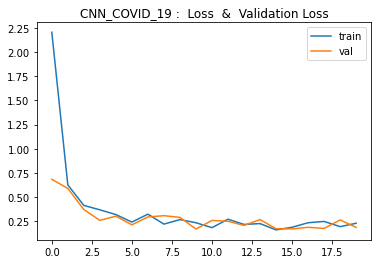

In [ ]:
plt.plot(hist.history['loss'], label = 'train')
plt.plot(hist.history['val_loss'], label = 'val')
plt.title('CNN_COVID_19 :  Loss  &  Validation Loss')
plt.legend()
plt.show()

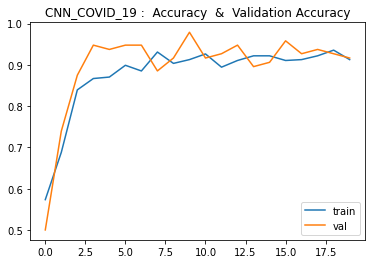

In [ ]:
plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label = 'val')
plt.title('CNN_COVID_19 :  Accuracy  &  Validation Accuracy')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Confusion Matrix
[[24 31]
 [30 25]]
classification_Report
              precision    recall  f1-score   support

      COVID+       0.44      0.44      0.44        55
      COVID-       0.45      0.45      0.45        55

    accuracy                           0.45       110
   macro avg       0.45      0.45      0.45       110
weighted avg       0.45      0.45      0.45       110



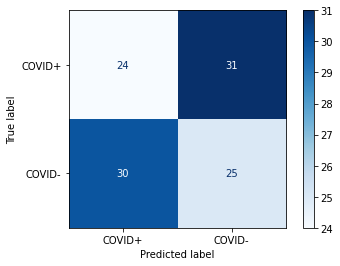

In [ ]:
# Confusion Matrix  & Pres  & Recall   & F1-Score

target_names = ['COVID+', 'COVID-']
label_names = [0,1]

Y_pred = model.predict_generator(testdata)
y_pred = np.argmax(Y_pred ,  axis = 1)

cm = confusion_matrix(testdata.classes, y_pred, labels = label_names)


print('Confusion Matrix')
print(confusion_matrix(testdata.classes, y_pred))

print('classification_Report')
print(classification_report(testdata.classes, y_pred, target_names=target_names))

disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Blues, values_format = 'g')
plt.show()


In [ ]:
# View X-Ray Scans Paths from Drive Directory

IMAGE_SIZE = (224,224)
DIR_NAME = '/content/drive/My Drive/Dataset/val/'
IMAGE_DIR = DIR_NAME + 'normal/'
imagePaths=[]
for dirname, _, filenames in os.walk(DIR_NAME):
    for filename in filenames:
      imagePaths.append(os.path.join(dirname, filename))

In [ ]:
imagePaths

['/content/drive/My Drive/Dataset/val/COVID-/IM-0125-0001.jpeg',
 '/content/drive/My Drive/Dataset/val/COVID-/IM-0122-0001.jpeg',
 '/content/drive/My Drive/Dataset/val/COVID-/IM-0149-0001.jpeg',
 '/content/drive/My Drive/Dataset/val/COVID-/IM-0151-0001.jpeg',
 '/content/drive/My Drive/Dataset/val/COVID-/IM-0147-0001.jpeg',
 '/content/drive/My Drive/Dataset/val/COVID-/IM-0166-0001.jpeg',
 '/content/drive/My Drive/Dataset/val/COVID-/IM-0176-0001.jpeg',
 '/content/drive/My Drive/Dataset/val/COVID-/IM-0137-0001.jpeg',
 '/content/drive/My Drive/Dataset/val/COVID-/IM-0141-0001.jpeg',
 '/content/drive/My Drive/Dataset/val/COVID-/IM-0168-0001.jpeg',
 '/content/drive/My Drive/Dataset/val/COVID-/IM-0236-0001.jpeg',
 '/content/drive/My Drive/Dataset/val/COVID-/IM-0213-0001.jpeg',
 '/content/drive/My Drive/Dataset/val/COVID-/IM-0229-0001.jpeg',
 '/content/drive/My Drive/Dataset/val/COVID-/IM-0211-0001.jpeg',
 '/content/drive/My Drive/Dataset/val/COVID-/IM-0214-0001.jpeg',
 '/content/drive/My Drive

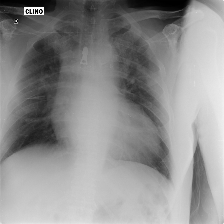

Covid


In [ ]:
# Model Prediction

image = cv2.imread('/content/drive/My Drive/Dataset/val/COVID+/7AF6C1AF-D249-4BD2-8C26-449304105D03.jpeg')
#image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))
img=np.reshape(image,(1,224,224,3))
cv2_imshow(image)
prediction=model.predict(img)
print(class_names[np.argmax(prediction)])


In [ ]:
# Saving the Model

model.save('Covid19Detector.h5') 